In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

ModuleNotFoundError: No module named 'tensorflow'

In [7]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

import missingno as msno # missing data visualization module for Python
import pandas_profiling

import gc
import datetime

%matplotlib inline
color = sns.color_palette()

In [3]:
pip install missingno

In [5]:
pip install pandas_profiling

  Using cached networkx-2.5-py3-none-any.whl (1.6 MB)
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27091 sha256=eb3d09e2d1e2a77344450a59fc4402c49b7e9a89d6cd87507df48d97af9a1a09
  Stored in directory: c:\users\samar\appdata\local\pip\cache\wheels\70\e1\52\5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
Successfully built htmlmin
Note: you may need to restart the kernel to use updated packages.


In [8]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 100)

In [10]:
data=pd.read_csv("../Dataset/data.csv", encoding = 'ISO-8859-1')

In [11]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
check missing values

In [12]:
data.isnull().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [13]:
data[Description].dropna()

NameError: name 'Description' is not defined

In [14]:
data=data.dropna()

In [15]:
data.isnull().any()

InvoiceNo      False
StockCode      False
Description    False
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID     False
Country        False
dtype: bool

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [17]:
data['CustomerID'] = data['CustomerID'].astype('int64')


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  int64  
 7   Country      406829 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 27.9+ MB


In [20]:
data.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69
std,248.69,69.32,1713.60
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13953.00
50%,5.00,1.95,15152.00
75%,12.00,3.75,16791.00
max,80995.00,38970.00,18287.00


we have negative values in the quantity coulmn

In [21]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


let see how much spent 

In [22]:
data['amountspent'] = data['Quantity'] * data['UnitPrice']


In [26]:
data['year'] = pd.DatetimeIndex(data['InvoiceDate']).year


In [27]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amountspent,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30,2010
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,2010


In [29]:
data['month'] = pd.to_datetime(data['InvoiceDate']).month

AttributeError: 'Series' object has no attribute 'month'

In [30]:
data['month'] = pd.DatetimeIndex(data['InvoiceDate']).month


In [31]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amountspent,year,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,2010,12


check the most customers with most number of orders

In [45]:
orders = data.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

orders.sort_values(by='InvoiceNo', ascending=False).head()

,CustomerID,Country,InvoiceNo
4050,17841,United Kingdom,7983
1903,14911,EIRE,5903
1308,14096,United Kingdom,5128
338,12748,United Kingdom,4642
1682,14606,United Kingdom,2782


we can see that most customers from United Kingdom	

check the customer who spent lots of money

In [47]:
moneyspent = data.groupby(by=['CustomerID','Country'], as_index=False)['amountspent'].sum()
moneyspent.sort_values(by='amountspent', ascending=False).head()

,CustomerID,Country,amountspent
1711,14646,Netherlands,279489.02
4241,18102,United Kingdom,256438.49
3766,17450,United Kingdom,187482.17
1903,14911,EIRE,132572.62
57,12415,Australia,123725.45


so a Customer from Netherlands spent more money   

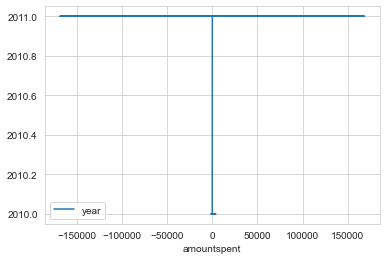

In [48]:
lines = data.plot.line(x='amountspent', y='year')


<AxesSubplot:xlabel='year'>

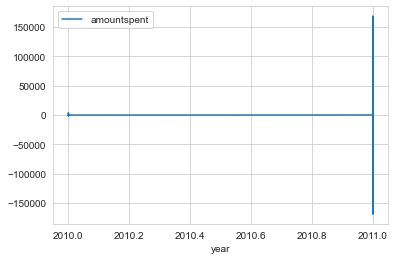

In [50]:
data.plot(x ='year', y='amountspent', kind = 'line')


AttributeError: 'DataFrame' object has no attribute 'quantity'

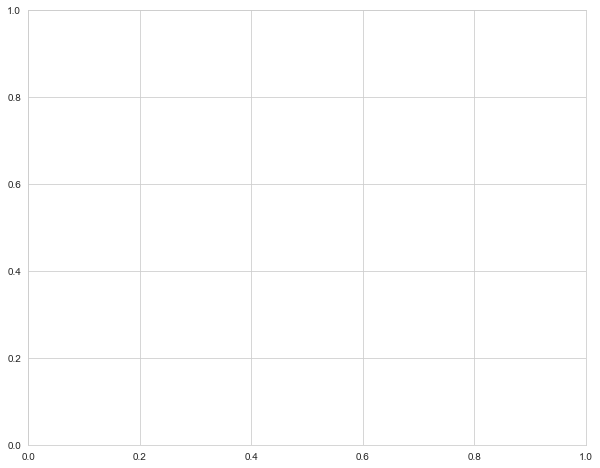

In [52]:
plt.subplots(figsize=(10,8))
sns.distplot(data.quantity[data.quantity < 50], label='amountspent').legend()

plt.xlabel('Unit Price')
plt.ylabel('Normalized Distribution')
plt.title('Unit Price Distribution')
plt.show()

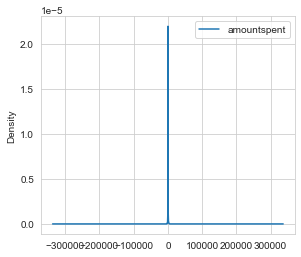

In [55]:
data[features].plot(kind='density', subplots=True, layout=(1, 2), 
                  sharex=False, figsize=(10, 4));

In [54]:
features = ['amountspent']


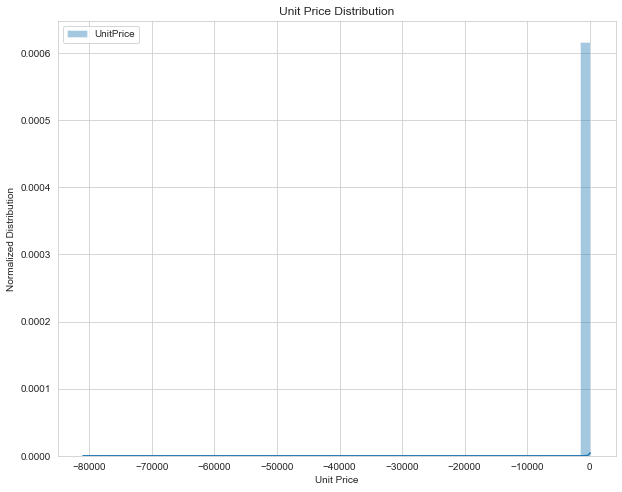

In [71]:

# Unit price distribition plot
plt.subplots(figsize=(10,8))
sns.distplot(data.Quantity[data.Quantity < 50], label='UnitPrice').legend()

plt.xlabel('Unit Price')
plt.ylabel('Normalized Distribution')
plt.title('Unit Price Distribution')
plt.show()

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  int64  
 7   Country      406829 non-null  object 
 8   amountspent  406829 non-null  float64
 9   year         406829 non-null  int64  
 10  month        406829 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 37.2+ MB


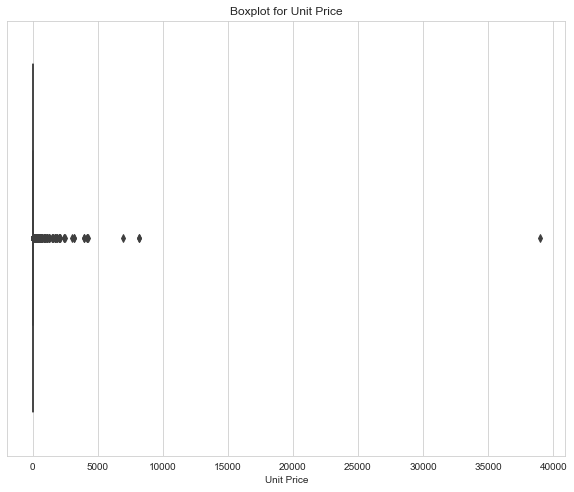

In [60]:

plt.subplots(figsize=(10,8))
sns.boxplot(data.UnitPrice)

plt.xlabel('Unit Price')
plt.title('Boxplot for Unit Price')
plt.show()

In [63]:
pip install sns

  Created wheel for sns: filename=sns-0.1-py3-none-any.whl size=2669 sha256=b5369deb2e381f3cb959724c27b2f5ba4e6193f3c888fc4b0a83b1d6e049e49f
  Stored in directory: c:\users\samar\appdata\local\pip\cache\wheels\cc\26\02\785cf1aeaa8d9e565796a1b962467bcdf62172c8fe12096ffb
Successfully built sns
Note: you may need to restart the kernel to use updated packages.


In [67]:
sns.palplot(color)


AttributeError: module 'sns' has no attribute 'palplot'

In [69]:
import seaborn as sns


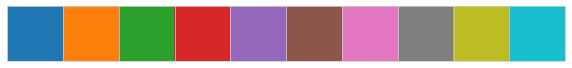

In [70]:
sns.palplot(color)


In [73]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amountspent,year,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,2010,12


In [75]:
ax = data.groupby('InvoiceNo')['year'].unique().value_counts().sort_index().plot('bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

TypeError: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.

In [76]:
data.groupby('InvoiceNo')['month'].unique().value_counts().sort_index()


TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[1]     1236
[2]     1202
[3]     1619
[4]     1384
[5]     1849
[6]     1707
[7]     1593
[8]     1544
[9]     2078
[10]    2263
[11]    3086
[12]    2629
Name: month, dtype: int64

TypeError: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.

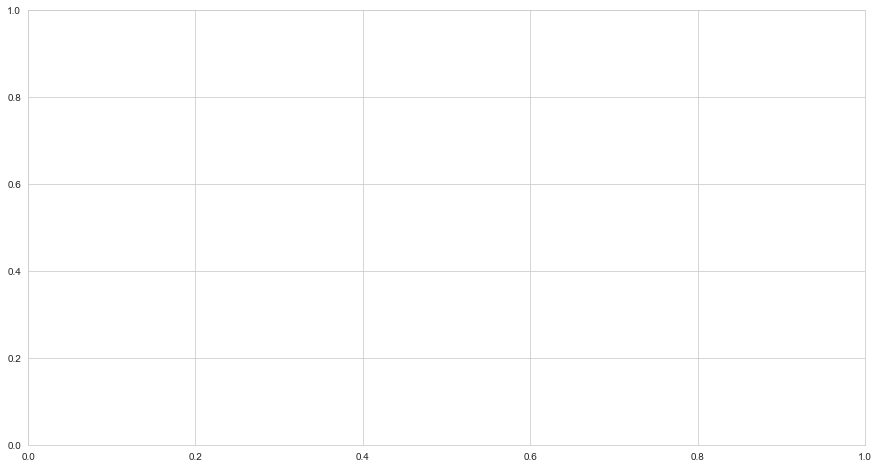

In [78]:

group_country_orders=data.groupby('Country')['InvoiceNo'].count().sort_values()
# del group_country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot('barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

In [85]:

import pandas as pd
import numpy as np

from datetime import date
import calendar

import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot

import re
import os
from nltk.tokenize import word_tokenize
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from collections import Counter
import operator

In [84]:
pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11434 sha256=5f91521dec44149d7e6d08fe38d50b87b02f42225070827778e618c45cf28532
  Stored in directory: c:\users\samar\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [88]:
data['InvoiceDate] = data.to_datetime(data['InvoiceDate'])


SyntaxError: invalid syntax (<ipython-input-88-427e030fdfda>, line 1)

In [89]:
data['InvoiceDate'] = data.to_datetime(data['InvoiceDate'],format="%m/%d/%Y %H:%M") 


AttributeError: 'DataFrame' object has no attribute 'to_datetime'

In [91]:
print('Number of Customers: ',data['CustomerID'].nunique())
print('Number of Products:  ',data['StockCode'].nunique())

Number of Customers:  4372
Number of Products:   3684


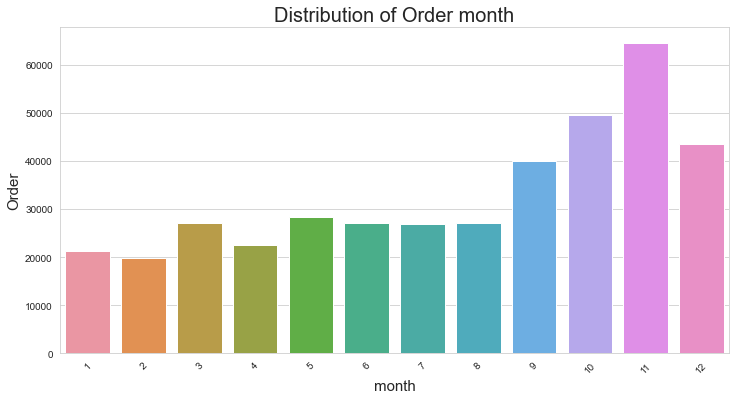

In [92]:
plt.figure(figsize=(12,6))
sns.countplot(x='month', data=data[~data['InvoiceNo'].str.startswith(('C'))])
plt.title('Distribution of Order month', fontsize=20)
plt.xlabel('month',fontsize=15)
plt.ylabel('Order',fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [96]:
con = data.groupby('Country')['InvoiceNo'].count().to_frame().reset_index().rename(columns={'InvoiceNo':'Total_Orders'})
con = con.drop([37])

KeyError: '[37] not found in axis'